In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from vrplib import read_solution

from pyvrp import Model, read
from pyvrp.plotting import (
    plot_coordinates,
    plot_instance,
    plot_result,
    plot_route_schedule,
)
from pyvrp.stop import MaxRuntime

# Classic VRPs

This notebook shows how to use PyVRP to solve two classic variants of the VRP: the capacitated vehicle routing problem (CVRP), and the vehicle routing problem with time windows (VRPTW).
It builds on the tutorial by showing additional VRP variants PyVRP can solve.
Additionally, the instance we solve here is much larger.

A CVRP instance is defined on a complete graph $G=(V,A)$, where $V$ is the vertex set and $A$ is the arc set. 
The vertex set $V$ is partitioned into $V=\{0\} \cup V_c$, where $0$ represents the depot and $V_c=\{1, \dots, n\}$ denotes the set of $n$ customers.
Each arc $(i, j) \in A$ has a weight $d_{ij} \ge 0$ that represents the travel distance from $i \in V$ to $j \in V$.
Each customer $i \in V_c$ has a demand $q_{i} \ge 0$.
The objective is to find a feasible solution that minimises the total distance.

A VRPTW instance additionally incorporates time aspects into the problem.
For the sake of exposition we assume the travel duration $t_{ij} \ge 0$ is equal to the travel distance $d_{ij}$ in this notebook.
Each customer $i \in V_c$ has a service time $s_{i} \ge 0$ and a (hard) time window $\left[e_i, l_i\right]$ that denotes the earliest and latest time that service can start.
A vehicle is allowed to arrive at a customer location before the beginning of the time window, but it must wait for the window to open to start the delivery. 
Each vehicle must return to the depot before the end of the depot time window $H$.
The objective is to find a feasible solution that minimises the total distance.

## The capacitated VRP

### Reading the instance

In this notebook we will solve the `X-n439-k37` instance, which is part of the [X instance set](http://vrp.atd-lab.inf.puc-rio.br/index.php/en/new-instances) that is widely used to benchmark CVRP algorithms.
The function `pyvrp.read` reads the instance file and converts it to a `ProblemData` instance. 
We pass the argument `round_func="round"` to compute the Euclidean distances rounded to the nearest integral, which is the convention for the X benchmark set.
We also load the best known solution to evaluate our solver later on.

In [2]:
INSTANCE = read("data/X-n439-k37.vrp", round_func="round")
BKS = read_solution("data/X-n439-k37.sol")

Let's plot the instance and see what we have.

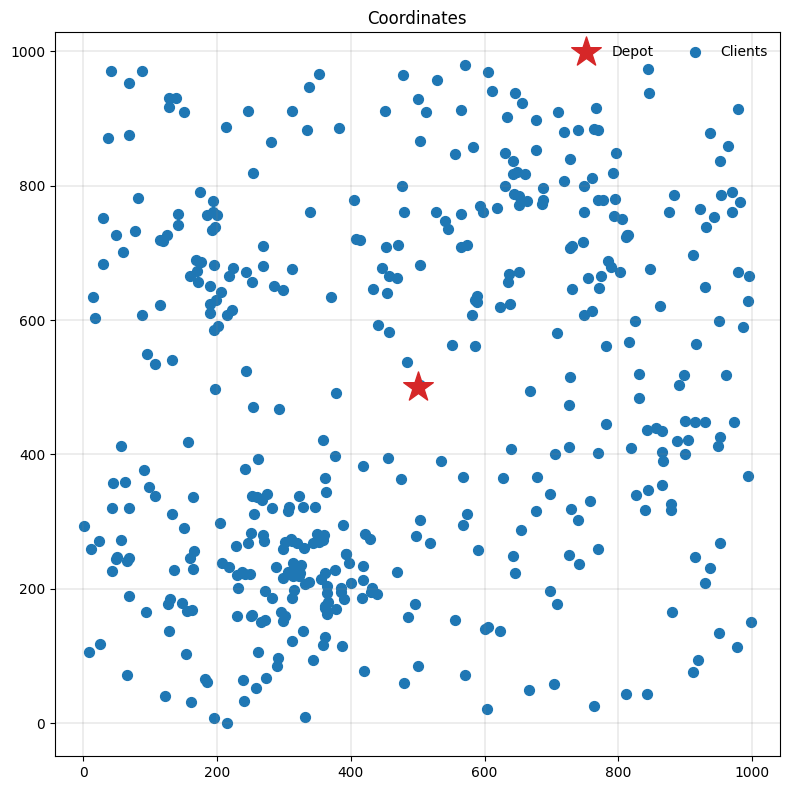

In [3]:
_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(INSTANCE, ax=ax)
plt.tight_layout()

### Solving the instance

We will again use the `Model` interface to solve the instance.
The `Model` interface supports a convenient `from_data` method that can be used to instantiate a model from a known `ProblemData` object.

In [4]:
model = Model.from_data(INSTANCE)
result = model.solve(stop=MaxRuntime(30), seed=42)
print(result)

Solution results
    # routes: 37
   # clients: 438
   objective: 36807.00
# iterations: 1473
    run-time: 30.00 seconds

Routes
------
Route  1: 260 3 169 370 133 425 223 349 267 400 97 72 
Route  2: 172 202 308 270 406 71 92 275 41 155 26 326 
Route  3: 348 411 410 386 299 392 139 200 145 122 418 421 
Route  4: 281 43 211 347 206 57 296 375 218 239 42 335 
Route  5: 228 346 162 435 166 345 250 385 438 312 381 404 
Route  6: 149 422 353 195 121 237 325 249 380 115 44 
Route  7: 110 409 416 407 366 384 403 17 412 83 388 225 
Route  8: 423 391 372 264 315 86 352 303 245 241 280 393 
Route  9: 233 324 229 268 377 433 337 242 360 342 221 227 
Route 10: 47 252 101 402 428 89 293 339 66 126 297 309 
Route 11: 383 253 266 319 329 351 432 396 420 413 321 243 
Route 12: 283 257 289 271 338 285 193 215 153 15 159 65 
Route 13: 437 323 246 138 376 350 286 341 98 137 251 146 
Route 14: 334 144 431 197 7 344 173 88 80 130 61 189 
Route 15: 140 274 113 116 196 75 56 22 210 118 91 154 
Route 16: 25

In [5]:
gap = 100 * (result.cost() - BKS["cost"]) / BKS["cost"]
print(f"Found a solution with cost: {result.cost()}.")
print(f"This is {gap:.1f}% worse than the best known", end=" ")
print(f"solution, which is {BKS['cost']}.")

Found a solution with cost: 36807.
This is 1.1% worse than the best known solution, which is 36391.


We've managed to find a near-optimal solution in 30 seconds!

The `result` object also contains useful statistics about the optimisation.
We can now plot these statistics as well as the final solution use `plot_result`.

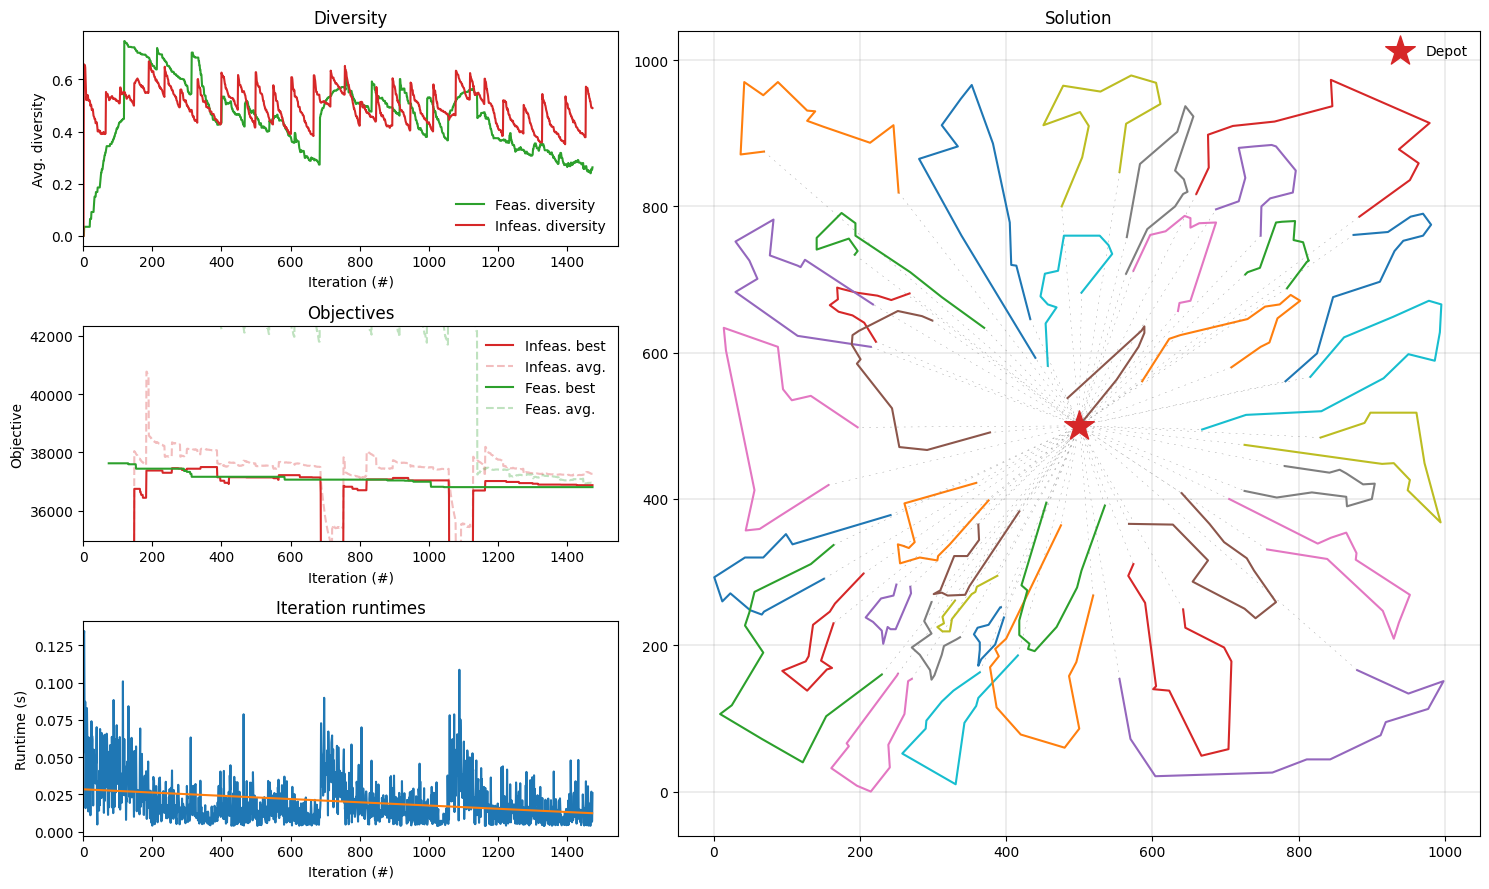

In [6]:
fig = plt.figure(figsize=(15, 9))
plot_result(result, INSTANCE, fig)
fig.tight_layout()

PyVRP internally uses a genetic algorithm consisting of a population of feasible and infeasible solutions.
These solutions are iteratively combined into new offspring solutions, that should result in increasingly better solutions. 
Of course, the solutions should not all be too similar: then there is little to gain from combining different solutions.
The top-right *Diversity* plot tracks the average diversity of solutions in each of the feasible and infeasible solution populations.
The *Objectives* plot gives an overview of the best and average solution quality in the current population.
Finally, the *Solution* plot shows the best observed solution.

## The VRP with time windows

We start with a basic example that loads an instance and solves it using the standard configuration used by the `Model` interface.
For the basic example we use one of the well-known Solomon instances.

We use the function `pyvrp.read`, which reads the instance file and converts it to a `ProblemData` instance.
We pass the following arguments: 
- `instance_format="solomon"`: this parses the instance file as a Solomon formatted instance.
- `round_func="trunc1"`: following the [DIMACS VRP challenge](http://dimacs.rutgers.edu/programs/challenge/vrp/) convention, this compute distances and durations truncated to one decimal place.


In [ ]:
INSTANCE = read(
    "data/RC208.vrp",
    instance_format="solomon",
    round_func="trunc1",
)
BKS = read_solution("data/RC208.sol")

Let's plot the instance and see what we have.
The function `plot_instance` will plot time windows, demands and coordinates, which should give us a good impression of what the instance looks like.
These plots can also be produced separately by calling the appropriate `plot_*` function.  

In [ ]:
fig = plt.figure(figsize=(12, 6))
plot_instance(INSTANCE, fig)

### Solving the instance

We will again use the `Model` interface to solve the instance.

In [ ]:
model = Model.from_data(INSTANCE)
result = model.solve(stop=MaxRuntime(5), seed=42)
print(result)

In [ ]:
cost = result.cost() / 10
gap = 100 * (cost - BKS["cost"]) / BKS["cost"]
print(f"Found a solution with cost: {cost}.")
print(f"This is {gap:.1f}% worse than the optimal solution {BKS['cost']}.")

We've managed to find the optimal solution in 5 seconds!

In [ ]:
fig = plt.figure(figsize=(15, 9))
plot_result(result, INSTANCE, fig)
fig.tight_layout()

We can also inspect some statistics of the different routes, such as route distance, various durations, the number of stops and total demand.

In [ ]:
solution = result.best
routes = solution.get_routes()

data = [
    {
        "num_stops": len(route),
        "distance": route.distance(),
        "service_duration": route.service_duration(),
        "wait_duration": route.wait_duration(),
        "time_warp": route.time_warp(),
        "demand": route.demand(),
    }
    for route in solution.get_routes()
]

tabulate([datum.values() for datum in data], data[0].keys(), tablefmt="html")

We can inspect the routes in more detail using the `plot_route_schedule` function.
This will plot distance on the x-axis, and time on the y-axis, separating actual travel/driving time from waiting and service time.
The clients visited are plotted as grey vertical bars indicating their time windows.
We can see a jump to the start of the time window in the main (earliest) time line when a vehicle arrives early at a customer and has to wait.
In some cases, there is slack in the route indicated by a semi-transparent region on top of the earliest time line.
The grey background indicates the remaining load of the truck during the route, where the (right) y-axis ends at the vehicle capacity.

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 9))
for idx, (ax, route) in enumerate(zip(axarr.reshape(-1), routes)):
    plot_route_schedule(
        INSTANCE,
        route,
        title=f"Route {idx}",
        ax=ax,
        legend=idx == 0,
    )

fig.tight_layout()

## Solving a larger VRPTW instance

To show that PyVRP can also handle much larger instances, we will solve one of the largest Gehring and Homberger VRPTW benchmark instances.
The selected instance - `RC2_10_5` - has 1000 clients.

In [ ]:
INSTANCE = read(
    "data/RC2_10_5.vrp",
    instance_format="solomon",
    round_func="trunc1",
)
BKS = read_solution("data/RC2_10_5.sol")

In [ ]:
fig = plt.figure(figsize=(15, 9))
plot_instance(INSTANCE, fig)

In [ ]:
model = Model.from_data(INSTANCE)
result = model.solve(stop=MaxRuntime(30), seed=42)

In [ ]:
cost = result.cost() / 10
gap = 100 * (cost - BKS["cost"]) / BKS["cost"]
print(f"Found a solution with cost: {cost}.")
print(f"This is {gap:.1f}% worse than the optimal solution {BKS['cost']}.")

In [ ]:
plot_result(result, INSTANCE)

## Conclusion

In this notebook, we used PyVRP's `Model` interface to solve a CVRP instance with 438 clients to near-optimality, as well as several VRPTW instances, including a large 1000 client instance.
Moreover, we demonstrated how to use the plotting tools to visualise the instance and statistics collected during the search procedure.